<a href="https://colab.research.google.com/github/s8narnor/Balance-Field-Length/blob/master/BFLCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Balance field length

[  3968.03686207  28546.57235322  50300.17143824  69816.71986561
  87542.03161911 103821.17769109 118926.27241591 133075.63780297
 146447.3256451  159188.85743192 171424.37480628 183259.98411816
 194787.8212682  206089.19746173 217237.07781896 228298.07219351
 239334.06833252 250403.60374703 261563.04932711 272867.66159369]


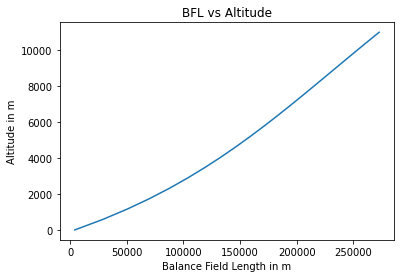

In [1]:
import matplotlib.pyplot as plt
import numpy as np


# Estimate BFL at sea level on standard day
# Step 1
e = 0.08294
wing_area = 199.2      # in feet square
s = 0.093025 * wing_area  # in metre square
b = 11.53    # in m
pi = 3.14
AR = (b*b)/s               # Aspect Ratio
k = 1/(pi*AR*e)

# Step 2
h = np.linspace(0, 11000, 20)       # height in metre
T1 = 288.16           # Temperature in K
a = -6.5 * (10**-3)
T2 = T1 + a*h
d1 = 1.225           # density in kg/m^3
t = (T1/T2)**4.25
d = d1/t
d_r = d/d1
W = 22686.74    # Gross_Weight in N
C_lmax = 1.6
Vs = ((2*W)/(d*s*C_lmax))**0.5

# Step 3
V2 = 1.2*Vs

# Step 4
# For propeller engine
Np = 3
Pto = 520
kp = 5.75
Dp = 6.5     # Diameter in feet
P = ((d_r*Np*Dp*Dp)/Pto)**0.333
Q = kp*Pto*P
T = 4.4482*Q       # Thrust in N


# Step 5
u = 0.01*C_lmax + 0.02

# Step 6
Cd_min = 0.035
CL2 = 0.694*C_lmax
CD = Cd_min + k*CL2*CL2
D2 = 0.5*d*V2*V2*s*CD        # Drag in N

# Step 7
Toei = T/2
Y2 =(Toei - D2)/W
Y2 = np.arcsin(Y2)
Y2min = 0.024
dY2 = Y2 - Y2min

# Step 8
# For Balance Field Length
g = 9.807              # gravity acceleration
A = 0.863/(1+(2.3*dY2))
B = ((W/s)/(d*g*CL2)) + h
C = (2.7 + (1/((T/W)-u)))
dsto = 200  # in m

Z = dsto/((np.sqrt(d_r))**0.5)
BFL = -((A*B*C) + Z)
print(BFL)
plt.plot(BFL, h)
plt.xlabel('Balance Field Length in m')
plt.ylabel('Altitude in m')
plt.title('BFL vs Altitude')
plt.show()

##Constrain Diagram for given aircraft 

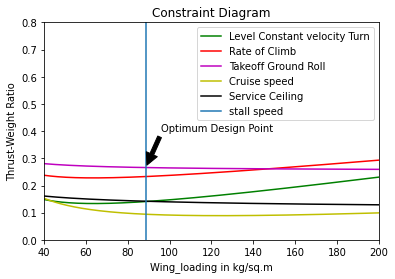

In [2]:
import numpy as np
import matplotlib.pyplot as plt

WS = np.linspace(40, 200, 320)
TW = 4.2693/WS + 0.001048*WS
TW1 = 0.1389 + 2.8330/WS + 0.0007017*WS
TW2 = 0.2543 + 1.0485/WS
TW3 = 5.5466/WS + 0.0003584*WS
TW4 = (0.3692/(np.sqrt(WS))) + 0.102969
WS1 = 88.78
plt.plot(WS, TW, 'g', label='Level Constant velocity Turn')
plt.plot(WS, TW1, 'r', label= 'Rate of Climb')
plt.plot(WS, TW2, 'm', label='Takeoff Ground Roll')
plt.plot(WS, TW3, 'y', label='Cruise speed')
plt.plot(WS, TW4, 'k', label='Service Ceiling')
plt.axvline(WS1, label='stall speed')
plt.annotate('Optimum Design Point', xy=(88.78, 0.2688), xytext=(96, 0.4),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.legend()
plt.xlim(40, 200)
plt.ylim(0, 0.8)
plt.title('Constraint Diagram')
plt.xlabel('Wing_loading in kg/sq.m')
plt.ylabel('Thrust-Weight Ratio')
plt.show()
